<a href="https://colab.research.google.com/github/sanjeet123456789/python-deep-learning/blob/master/Reinforcement_Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Environment
#Agent(explore the environment)
#State (where you are in environment)
#action (interacting with the environment)
#Reward(agent is trying to maximise the reward by going to different states in an environment)

#Q-Learning is a basic way to implement reenforcement learning

#Randomly picking a valid action and updating Q-Tables
# Using the current Q-Table to find the best action

#Check out Q-Values formula for reinforcement learning
#Learning Rates(alpha)
# Discount Factor(gamma)



In [0]:
import gym
env=gym.make('FrozenLake-v0')#using frogen state Environment
print(env.observation_space.n)#get number of states
print(env.action_space.n)#getnumber of actions up,right,left,down

16
4


In [0]:
env.reset() #reset environment to default state

0

In [0]:
action=env.action_space.sample() #get a random action
print(action)

1


In [0]:
observation,reward,done,info=env.step(action) # take action ,notice it return types

In [0]:
env.render() #render the GUI for the environment

  (Down)
SFFF
FHFH
FFFH
HFFG


In [0]:
#Building the q-Table
import gym
import numpy as np
import time

env=gym.make('FrozenLake-v0')
STATES=env.observation_space.n
ACTIONS=env.action_space.n



In [0]:
Q=np.zeros((STATES,ACTIONS))
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [0]:
EPISODES=2000 #how many times to run the environment from the begining

MAX_STEPS=100 #max number of steps allowed for each running of the environment
RENDER=False 
LEARNING_RATE=0.81
GAMMA=0.96

In [0]:
#Picking an action wiht 90% chance of picking a random 
epsilon=0.9

#code to pick action
if np.random.uniform(0,1)<epsilon:#we will check if a randomly selected value is less than epsilon
  action=env.action_space.sample()#take random action
else:
  action=np.argmax(Q[STATES, :]) # use Qtable to pick best actoin based on current action

IndexError: ignored

In [0]:
# Q[STATES,action]=Q[STATES,action]+LEARNING_RATE*(reward+GAMMA*np.max(Q[NEW_STATE, :])-Q[STATES,action])

IndexError: ignored

In [0]:
rewards=[]
for episode in range(EPISODES):
  state=env.reset()
  for _ in range(MAX_STEPS):
    if RENDER:
      env.render()
    if np.random.uniform(0,1)<epsilon:
      action=env.action_space.sample()
    else:
      action=np.argmax(Q[state, :])
    next_state,reward,done,_=env.step(action)

    Q[state,action]=Q[state,action]+LEARNING_RATE*(reward+GAMMA*np.max(Q[next_state, :])-Q[state,action])

    state=next_state
    if done:
      rewards.append(reward)
      epsilon-=0.001
      break #after reaching the goal
    
print(Q)
print(f"Average reward:{sum(rewards)/len(rewards)}:")


[[3.14894108e-01 7.21423691e-03 9.66937480e-03 9.69584212e-03]
 [2.42041341e-03 4.18439652e-03 6.33027773e-03 3.79794980e-01]
 [2.28217171e-01 3.51701128e-03 9.14278689e-03 8.88666491e-03]
 [2.78122417e-03 2.48114013e-03 4.27115002e-03 9.11745126e-03]
 [2.40329995e-01 1.46129706e-03 4.24741139e-03 2.09869721e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.27817226e-02 2.13824828e-06 1.44802807e-06 2.58541736e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.73827729e-03 2.95503740e-03 3.38834636e-03 3.77406871e-01]
 [3.02218381e-03 5.24405889e-01 3.50805679e-03 3.67119517e-03]
 [2.42327305e-01 9.25479110e-04 9.53610248e-04 1.20387171e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.51870225e-02 2.17756488e-02 8.16338924e-01 9.59936911e-02]
 [1.10508544e-01 9.88298619e-01 5.78116516e-02 1.85882259e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

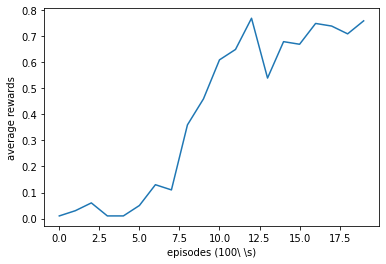

In [0]:
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)
avg_rewards=[]
for i in range(0,len(rewards),100):
  avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel('average rewards')
plt.xlabel('episodes (100\ \s)')
plt.show()